In [1]:
import numpy as np
from textblob import TextBlob 
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
from better_profanity import profanity

In [2]:
df = pd.read_csv('xxxxxxxxxxxxxxxxxx\Books_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   market_place       200 non-null    object
 1   product_title      200 non-null    object
 2   star_rating        200 non-null    int64 
 3   helpful_votes      200 non-null    int64 
 4   total_votes        200 non-null    int64 
 5   verified_purchase  200 non-null    object
 6   review_headline    200 non-null    object
 7   Review             200 non-null    object
 8   review_date        200 non-null    object
 9   review_day         200 non-null    object
 10  review_month       200 non-null    object
 11  review_year        200 non-null    int64 
 12  product_category   200 non-null    object
dtypes: int64(4), object(9)
memory usage: 20.4+ KB


In [4]:
review_list = list(df['Review'])

In [5]:
review_list[0:10]

['I love it and so does my students!',
 "My wife and I ordered 2 books and gave them as presents...one to a friend's daughter and the other to our grandson! Both children were so happy with the story, by author Katrina Streza, and they were overjoyed with the absolutely adorable artwork, by artist Michele Katz, throughout the book! We highly recommend &#34;I Saw a Friend&#34; to all your little ones!!!",
 'Great book just like all the others in the series.',
 'So beautiful',
 "Enjoyed the author's story and his quilts are incredible. I have plans to make three.",
 "&#34;Secrets in the Shallows,&#34; Book 1 of &#34;The Monastery Murders&#34; series grabbed me and drew me in! Book 2, &#34;Devil in the Detals&#34; tightened its hold on me and now I'm addicted! Did Mother Superior really murder the two Catholic school boys? If she didn't, then who did, and will the actual murderer be found out and caught? Did the murder of the beautiful, golden tressed nun and a boy's apparent suicide ten 

In [6]:
def cleaning_reviews(rev):
    import re
    if type(rev) == np.float64:
        return ""
    r = rev.lower()
    r = profanity.censor(r)
    r = re.sub("'", "", r) # This is to avoid removing contractions in english
    r = re.sub("@[A-Za-z0-9_]+","", r)
    r = re.sub("#[A-Za-z0-9_]+","", r)
    r = re.sub(r'http\S+', '', r)
    r = re.sub('[()!?]', ' ', r)
    r = re.sub('\[.*?\]',' ', r)
    r = re.sub("[^a-z0-9]"," ", r)
    r = r.split()
    stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]
    r = [w for w in r if not w in stopwords]
    r = " ".join(word for word in r)
    return r

In [7]:
cleaned = [cleaning_reviews(tw) for tw in review_list]

In [8]:
cleaned[0:10]

['i love it so does my students',
 'my wife i ordered 2 books gave them as presents one friends daughter other our grandson both children were so happy with story by author katrina streza they were overjoyed with absolutely adorable artwork by artist michele katz throughout book we highly recommend i saw friend all your little ones',
 'great book just like all others series',
 'so beautiful',
 'enjoyed authors story his quilts are incredible i have plans make three',
 'secrets shallows book 1 monastery murders series grabbed me drew me book 2 devil detals tightened its hold me now im addicted did mother superior really two catholic school boys if she didnt then who did will actual murderer be found out caught did beautiful golden tressed nun boys apparent suicide ten years earlier tie with more recent murders what is spirit monastery trying say some answers are revealed this book but mystery broadens many more questions arise i enjoyed this gripping book immensely you will too now i mu

## Now lest's do the fun part - Sentiment Analysis

In [9]:
# Defining the sentiment objects using TextBlob
sentiment_object = [TextBlob(rv) for rv in cleaned]

In [10]:
sentiment_object[0:10]

[TextBlob("i love it so does my students"),
 TextBlob("my wife i ordered 2 books gave them as presents one friends daughter other our grandson both children were so happy with story by author katrina streza they were overjoyed with absolutely adorable artwork by artist michele katz throughout book we highly recommend i saw friend all your little ones"),
 TextBlob("great book just like all others series"),
 TextBlob("so beautiful"),
 TextBlob("enjoyed authors story his quilts are incredible i have plans make three"),
 TextBlob("secrets shallows book 1 monastery murders series grabbed me drew me book 2 devil detals tightened its hold me now im addicted did mother superior really two catholic school boys if she didnt then who did will actual murderer be found out caught did beautiful golden tressed nun boys apparent suicide ten years earlier tie with more recent murders what is spirit monastery trying say some answers are revealed this book but mystery broadens many more questions arise i

In [11]:
sentiment_object[0].polarity

0.5

In [12]:
sentiment_value = [[review.sentiment.polarity , str(review)] for review in sentiment_object]

In [13]:
sentiment_df = pd.DataFrame(sentiment_value, columns=['Polarity','Reviews'])

In [14]:
possitive=0
negative=0
neutral=0

for polarity in sentiment_df['Polarity']:
    if polarity > 0:
        #print("Positive")
        possitive=possitive+1
        
    elif polarity < 0:
        #print("Negative")
        negative=negative+1
    else:
        #print("Neutral")
        neutral=neutral+1
total_sentiments = [possitive,negative,neutral]

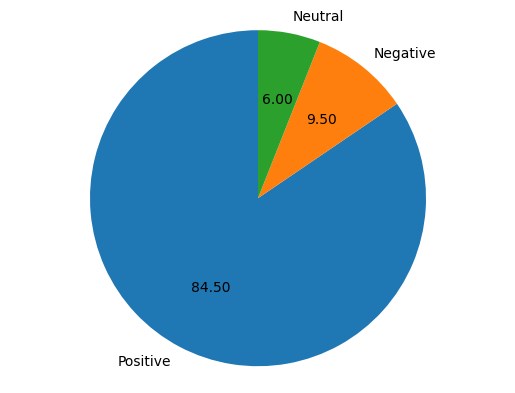

In [15]:
pieLabels=["Positive","Negative","Neutral"]

populationShare=total_sentiments

figureObject, axesObject = plt.subplots()

axesObject.pie(populationShare,labels=pieLabels,autopct='%1.2f',startangle=90)

axesObject.axis('equal')

plt.show()

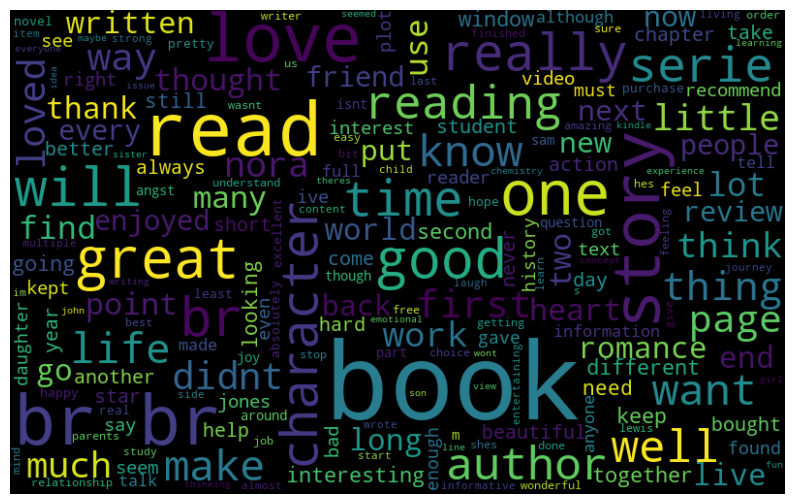

In [16]:
all_words = ' '.join([text for text in cleaned])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()